# <font color='purple'>Machine Learning  </font>

## <font color='purple'>Midterm Exam 2 </font>

### Importing dependencies 

In [1074]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split,GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

import datetime
from itertools import product

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

import warnings
warnings.filterwarnings('ignore')

### Information about dataset

**People**

* ID: Customer’s unique identifier
* Year_Birth: Customer’s birth year
* Education: Customer’s education level
* Marital_Status: Customer’s marital status
* Income: Customer’s yearly household income
* Kidhome: Number of children in customer’s household
* Teenhome: Number of teenagers in customer’s household
* Dt_Customer: Date of customer’s enrollment with the company
* Recency: Number of days since customer’s last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise
* Country: Customer’s location

**Products** 

* MntWines: Amount spent on wine in the last 2 years
* MntFruits: Amount spent on fruits in the last 2 years
* MntMeatProducts: Amount spent on meat in the last 2 years
* MntFishProducts: Amount spent on fish in the last 2 years
* MntSweetProducts: Amount spent on sweets in the last 2 years
* MntGoldProds: Amount spent on gold in the last 2 years

**Place**

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month
* NumDealsPurchases: Number of purchases made with a discount



**Promotion**


* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Reading the data 

In [1075]:
df = pd.read_csv('marketing_data.csv')

## Data Cleaning and Analysis

In [1076]:
print("This dataset has {}".format(df.shape[0])+" rows and {}".format(df.shape[1])+ " columns")

This dataset has 2240 rows and 28 columns


In [1077]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [1078]:
# General information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### Correcting data types 

In [1079]:
df['ID'] = df['ID'].astype('O')

In [1080]:
#df.columns = df.columns.str.replace(' ', '')
df = df.rename(columns={' Income ': 'Income'})

In [1081]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

In [1082]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [1083]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Checking for duplicates

In [1084]:
df.duplicated().sum()

0

### Checking NA values

In [1085]:
df_nas = pd.DataFrame(df.isna().sum(), columns=['Number of NAs'])
df_nas['Percentage of NAs'] = round(df_nas['Number of NAs'] / df.shape[0] *100, 3)
df_nas

,Number of NAs,Percentage of NAs
ID,0,0.000
Year_Birth,0,0.000
Education,0,0.000
Marital_Status,0,0.000
Income,24,1.071
Kidhome,0,0.000
Teenhome,0,0.000
Dt_Customer,0,0.000
Recency,0,0.000
MntWines,0,0.000


### Filling NA values

In [1086]:
df['Income'].fillna(df['Income'].median(), inplace=True)

### Summary Statistics

In [1087]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1088]:
df.describe(include='object')

,ID,Education,Marital_Status,Country
count,2240,2240,2240,2240
unique,2240,5,8,8
top,4095,Graduation,Married,SP
freq,1,1127,864,1095


## Feature Engineering

In [1089]:
df['children'] = df['Kidhome'] + df['Teenhome']

In [1090]:
df['spendings'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [1091]:
df['spendings'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: spendings, dtype: float64

In [1092]:
bins = [5, 500, 1000, 1500, 2000, np.inf]
cuts = ['500', '500-1000', '1000-1500', '1500-2000', '2000+']
df['spending_cat'] = pd.cut(df['spendings'], bins, labels=cuts)

In [1093]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [1094]:
bins = [5000, 10000, 25000, 40000, 60000, np.inf]
cuts = ['10000', '10000-25000', '25000-40000', '40000-60000', '60000+']
df['income_cat'] = pd.cut(df['Income'], bins, labels=cuts)

In [1095]:
df['num_purch'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebVisitsMonth']

## Data Visualization

In [1096]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'children',
       'spendings', 'spending_cat', 'income_cat', 'num_purch'],
      dtype='object')

In [1097]:
counts = df['Country'].value_counts()
counts

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

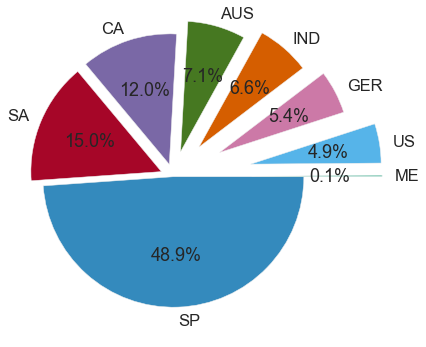

In [1098]:
plt.subplots(figsize=[6,6])
explode = ( 0,0.1,0.1,0.2,0.3,0.4,0.6,0.6)
counts = df['Country'].value_counts()
sizes = counts.values.tolist()
plt.pie(sizes,labels=counts.index, explode = explode,  counterclock=False, autopct='%1.1f%%')
plt.show()

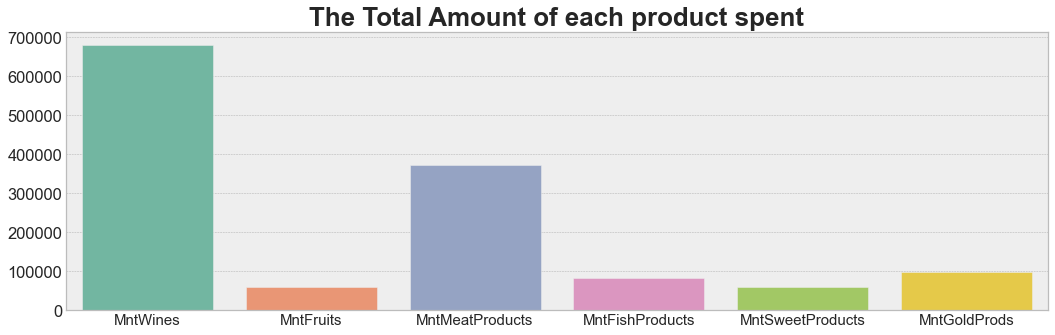

In [1099]:
col_products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data = df[col_products].sum()
plt.figure(figsize=(15,5))
plt.title('The Total Amount of each product spent',fontweight ="bold")
x=sns.barplot(x=col_products,y=data.values,palette='Set2')
x.set_xticklabels(col_products, size=15)
plt.tight_layout()

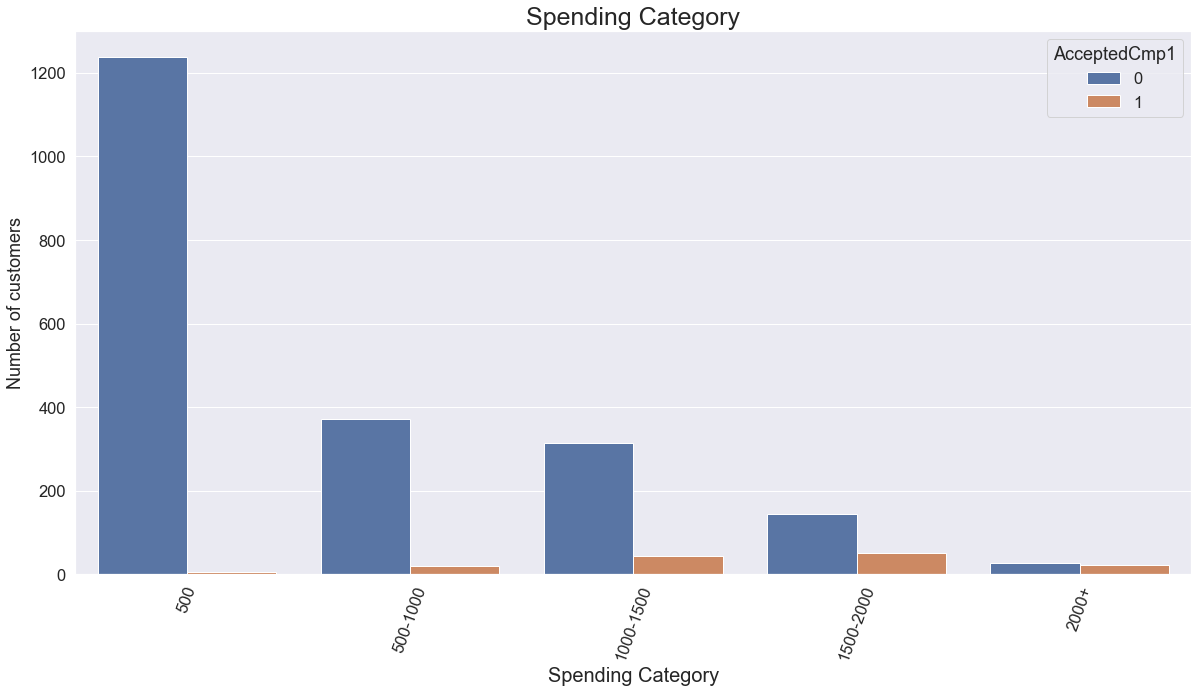

In [1100]:
plt.figure(figsize=(20, 10))
sns.set(font_scale = 1.5)
ax = sns.countplot(df["spending_cat"],hue=df["AcceptedCmp1"], data= df)
plt.xlabel("Spending Category", size = 20)
plt.ylabel('Number of customers')
plt.title("Spending Category", size = 25 )
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
plt.show()

In [1101]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'children',
       'spendings', 'spending_cat', 'income_cat', 'num_purch'],
      dtype='object')

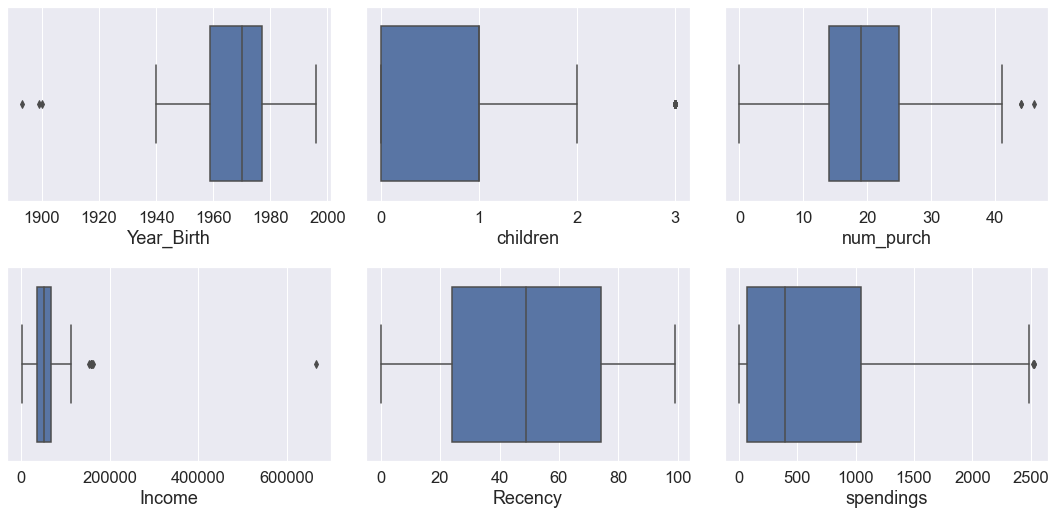

In [1102]:
fig, axs = plt.subplots(2,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['Year_Birth'], ax = axs[0,0])
plt2 = sns.boxplot(df['children'], ax = axs[0,1])
plt3 = sns.boxplot(df['num_purch'], ax = axs[0,2])
plt4 = sns.boxplot(df['Income'], ax = axs[1,0])
plt5 = sns.boxplot(df['Recency'], ax = axs[1,1])
plt6 = sns.boxplot(df['spendings'], ax = axs[1,2])

plt.tight_layout()

In [1103]:
df.drop(df.loc[df['Year_Birth']==1893].index, inplace=True)
df.drop(df.loc[df['Year_Birth']==1899].index, inplace=True)
df.drop(df.loc[df['Year_Birth']==1900].index, inplace=True)
df.drop(df.loc[df['Income']==666666.0].index, inplace=True)
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,children,spendings,num_purch
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,1968.898032,51952.614043,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,...,0.072898,0.074687,0.072451,0.064401,0.013417,0.149374,0.008945,0.950805,605.986583,20.191413
std,11.703281,21411.466851,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,...,0.260027,0.262944,0.259291,0.245520,0.115077,0.356536,0.094173,0.752204,601.865156,7.291811
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,1959.000000,35502.500000,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,14.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,396.500000,19.000000
75%,1977.000000,68275.750000,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1045.500000,25.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2525.000000,46.000000


array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>],
       [<AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>],
       [<AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'spendings'}>,
       

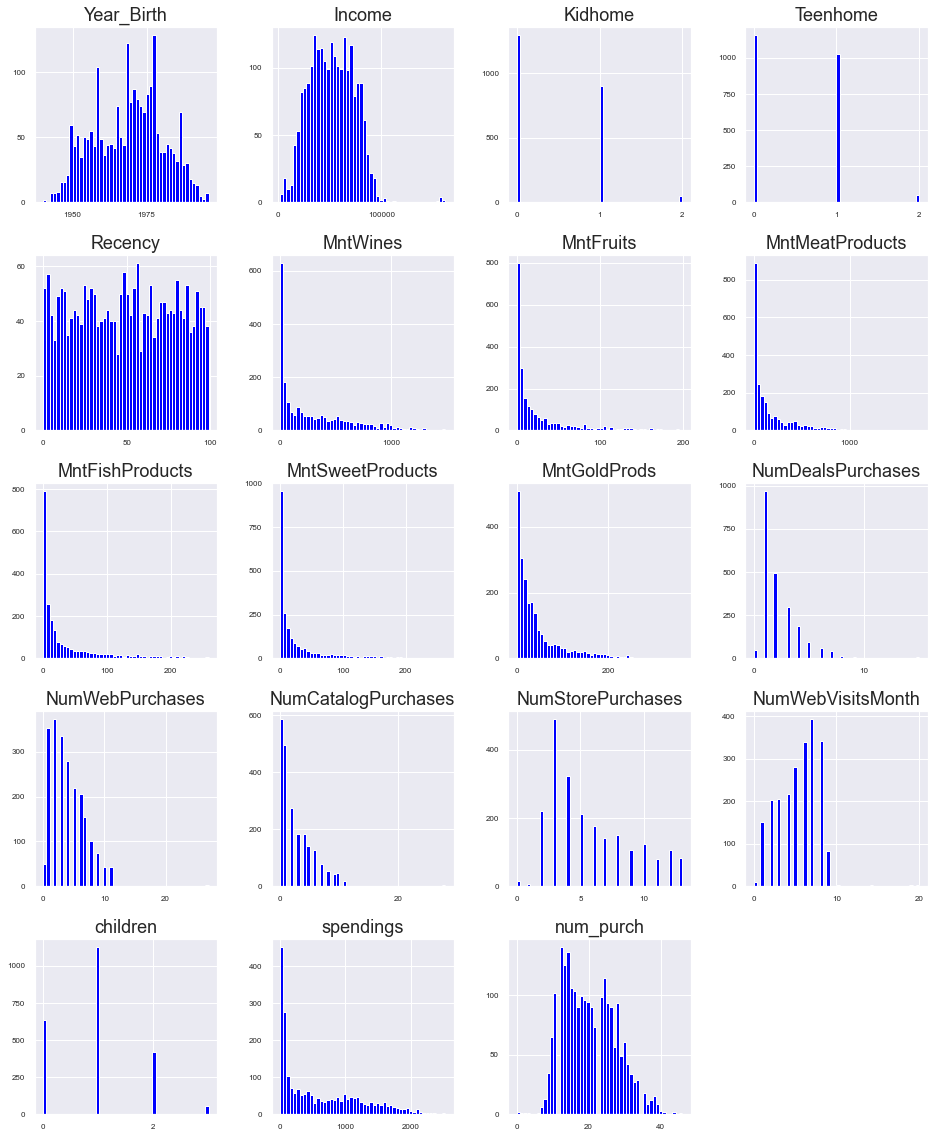

In [1104]:


list(set(df.dtypes.tolist()))
df_num = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,color="Blue")

Text(0, 0.5, '')

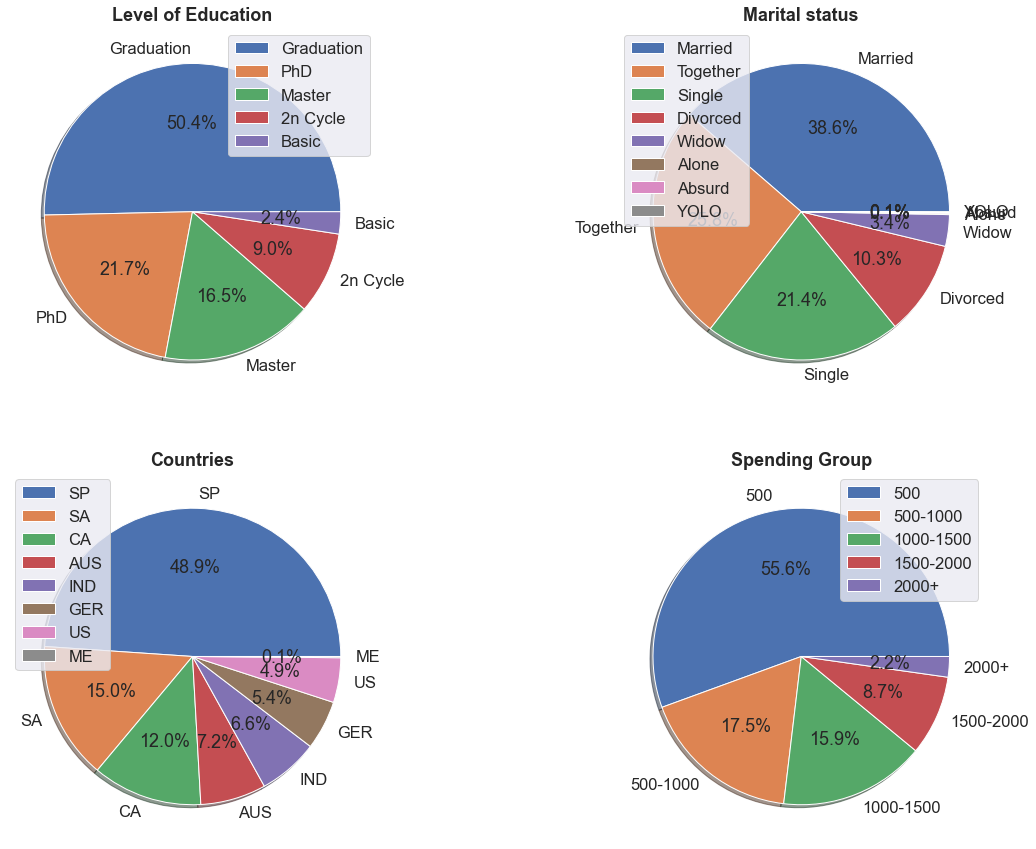

In [1105]:
f,ax=plt.subplots(2,2,figsize=(20,15))
df['Education'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][0],shadow=True,legend=True)
ax[0][0].set_title('Level of Education',fontweight ="bold") 
ax[0][0].set_ylabel('')
df['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][1],shadow=True,legend=True)
ax[0][1].set_title('Marital status',fontweight ="bold") 
ax[0][1].set_ylabel('')
df['Country'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1][0],shadow=True,legend=True)
ax[1][0].set_title('Countries',fontweight ="bold") 
ax[1][0].set_ylabel('')
df['spending_cat'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1][1],shadow=True,legend=True)
ax[1][1].set_title('Spending Group',fontweight ="bold") 
ax[1][1].set_ylabel('')

## Clustering

In [1106]:
cluster_data  = df[['Income', 'Recency', 'children', 'spendings', 'num_purch']]
cluster_data.describe()

,Income,Recency,children,spendings,num_purch
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,51952.614043,49.116279,0.950805,605.986583,20.191413
std,21411.466851,28.957284,0.752204,601.865156,7.291811
min,1730.000000,0.000000,0.000000,5.000000,0.000000
25%,35502.500000,24.000000,0.000000,69.000000,14.000000
50%,51381.500000,49.000000,1.000000,396.500000,19.000000
75%,68275.750000,74.000000,1.000000,1045.500000,25.000000
max,162397.000000,99.000000,3.000000,2525.000000,46.000000


In [1107]:
scaler = StandardScaler()
data_stand = scaler.fit_transform(cluster_data)

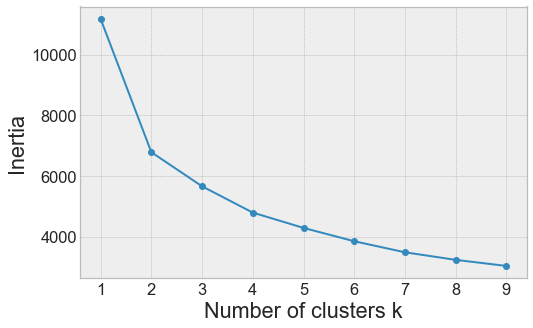

In [1108]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_stand)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

Looks like the best value  for k is 2 (two clusters).

In [1109]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(data_stand)

KMeans(n_clusters=2, random_state=42)

In [1110]:
segm_labels = cluster_data.copy()
segm_labels['Segments'] = kmeans.labels_
segm_labels.head()

,Income,Recency,children,spendings,num_purch,Segments
0,84835.0,0,0,1190,16,1
1,57091.0,0,0,577,23,1
2,67267.0,0,1,251,13,0
3,32474.0,0,2,11,11,0
4,21474.0,0,1,91,15,0


In [1111]:
profiling = segm_labels.groupby(['Segments'], as_index=False).median()
profiling

,Segments,Income,Recency,children,spendings,num_purch
0,0,36947.0,49,1,78,14
1,1,69805.0,50,1,1103,25


In [1112]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(data_stand)

KMeans(n_clusters=3, random_state=42)

In [1113]:
segm_labels = cluster_data.copy()
segm_labels['Segments'] = kmeans.labels_
segm_labels.head()

,Income,Recency,children,spendings,num_purch,Segments
0,84835.0,0,0,1190,16,1
1,57091.0,0,0,577,23,1
2,67267.0,0,1,251,13,0
3,32474.0,0,2,11,11,0
4,21474.0,0,1,91,15,0


In [1114]:
profiling = segm_labels.groupby(['Segments'], as_index=False).median()
profiling

,Segments,Income,Recency,children,spendings,num_purch
0,0,34935.0,49.0,1.0,66.0,14.0
1,1,77142.0,54.0,0.0,1382.0,23.0
2,2,59329.0,48.0,1.0,730.5,27.0


##  DBSCAN

In [1115]:
dbscan1 = DBSCAN(eps=0.05 ,min_samples=3,metric='euclidean')

In [1116]:
dbscan1.fit(data_stand)

DBSCAN(eps=0.05, min_samples=3)

In [1117]:
segm_labels = cluster_data.copy()
segm_labels['Segments'] = dbscan1.labels_
segm_labels.head()

,Income,Recency,children,spendings,num_purch,Segments
0,84835.0,0,0,1190,16,-1
1,57091.0,0,0,577,23,-1
2,67267.0,0,1,251,13,-1
3,32474.0,0,2,11,11,-1
4,21474.0,0,1,91,15,-1


In [1118]:
profiling = segm_labels.groupby(['Segments'], as_index=False).median()
profiling

,Segments,Income,Recency,children,spendings,num_purch
0,-1,51381.5,49.0,1.0,400.5,20.0
1,0,48432.0,3.0,1.0,424.0,27.0
2,1,18929.0,15.0,0.0,85.0,12.0
3,2,44319.0,18.0,2.0,41.0,12.0
4,3,39922.0,30.0,1.0,156.0,17.0
5,4,35860.0,37.0,2.0,49.0,11.0
6,5,28691.0,56.0,1.0,34.0,13.0
7,6,83844.0,57.0,0.0,1574.0,21.0
8,7,67445.0,63.0,1.0,1174.0,38.0
9,8,63841.0,64.0,1.0,908.0,28.0


In [1119]:
dbscan2 = DBSCAN(eps=1 ,min_samples=5,metric='euclidean')

In [1120]:
dbscan2.fit(data_stand)

DBSCAN(eps=1)

In [1121]:
segm_labels = cluster_data.copy()
segm_labels['Segments'] = dbscan2.labels_
segm_labels.head()

,Income,Recency,children,spendings,num_purch,Segments
0,84835.0,0,0,1190,16,0
1,57091.0,0,0,577,23,0
2,67267.0,0,1,251,13,1
3,32474.0,0,2,11,11,2
4,21474.0,0,1,91,15,1


In [1122]:
profiling = segm_labels.groupby(['Segments'], as_index=False).median()
profiling

,Segments,Income,Recency,children,spendings,num_purch
0,-1,74279.5,63.5,2.0,1115.0,28.0
1,0,72045.5,49.5,0.0,1189.5,21.0
2,1,47682.0,49.0,1.0,304.0,19.0
3,2,43800.0,49.0,2.0,91.0,16.0
4,3,40737.0,61.0,3.0,61.0,14.0


In [1123]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'children',
       'spendings', 'spending_cat', 'income_cat', 'num_purch'],
      dtype='object')

In [1124]:
final = df[['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines', 'MntFruits', 'Kidhome',
       'Teenhome', 
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'children',
       'spendings', 'spending_cat','Complain',  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response']]

In [1125]:
final_dummies = pd.get_dummies(final,dtype= int)

In [1126]:
final_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2236 non-null   float64
 1   Recency                  2236 non-null   int64  
 2   MntWines                 2236 non-null   int64  
 3   MntFruits                2236 non-null   int64  
 4   Kidhome                  2236 non-null   int64  
 5   Teenhome                 2236 non-null   int64  
 6   MntMeatProducts          2236 non-null   int64  
 7   MntFishProducts          2236 non-null   int64  
 8   MntSweetProducts         2236 non-null   int64  
 9   MntGoldProds             2236 non-null   int64  
 10  NumCatalogPurchases      2236 non-null   int64  
 11  NumStorePurchases        2236 non-null   int64  
 12  NumWebVisitsMonth        2236 non-null   int64  
 13  children                 2236 non-null   int64  
 14  spendings               

In [1127]:
y = final_dummies. Response
X = final_dummies.drop(['Response'],axis = 1)

# Logistic Regression with SMOTE

In [1128]:
resampling = BorderlineSMOTE()
model = LogisticRegression(solver='liblinear')
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [1129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1130]:
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

In [1131]:
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       566
           1       0.66      0.52      0.59       105

    accuracy                           0.88       671
   macro avg       0.79      0.74      0.76       671
weighted avg       0.88      0.88      0.88       671

Confusion matrix:
 [[538  28]
 [ 50  55]]


# Random Forest

In [1132]:
final = df[['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines', 'MntFruits', 'Kidhome',
       'Teenhome', 
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'children','spendings',
     'spending_cat','Complain', 'num_purch',  'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response']]

In [1133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestClassifier(random_state=5, n_estimators=42)

In [1134]:
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')

predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

Accuracy Score:
0.867
ROC Score:
0.873515059734141

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       566
           1       0.65      0.32      0.43       105

    accuracy                           0.87       671
   macro avg       0.77      0.65      0.68       671
weighted avg       0.85      0.87      0.85       671


Confusion Matrix:
[[548  18]
 [ 71  34]]


## Best Regards

## Shushan Hovakimyan